<a href="https://colab.research.google.com/github/EslamKampoza/machine-intelligence-paper-/blob/main/builtin_smote1-1-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import time
from matplotlib import pyplot
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
import sklearn.neural_network as nn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
#Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD

In [33]:
##Ploting Confusion Matrix
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=pyplot.cm.Blues,
                           decsnTreeClf=None):
    #This function prints and plots the confusion matrix.
    pyplot.imshow(cm,interpolation='nearest',cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks=np.arange(len(classes))
    pyplot.xticks(tick_marks,classes,rotation=45)
    pyplot.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]> thresh else "black" )

    pyplot.tight_layout()
    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.show()

In [34]:
train = pd.read_csv('WISDM.csv',header=None)
train = train[(train != '?').all(axis=1)]
#test = pd.read_csv('test.csv')
labels1 = train[train.columns[len(train.columns)-1]]
Data1 = train[train.columns[:-1]]
peek=train.head()
print(peek)
print(train.shape)


   0     1     2     3     4     5     6     7     8     9   ...      35  \
0  33  0.04  0.09  0.14  0.12  0.11  0.10  0.08  0.13  0.13  ...  293.94   
1  33  0.12  0.12  0.06  0.07  0.11  0.10  0.11  0.09  0.12  ...  269.44   
2  33  0.14  0.09  0.11  0.09  0.09  0.11  0.12  0.08  0.05  ...  248.65   
3  33  0.06  0.10  0.09  0.09  0.11  0.07  0.12  0.10  0.14  ...  709.09   
4  33  0.12  0.11  0.10  0.08  0.10  0.14  0.10  0.11  0.08  ...    3300   

        36    37    38    39    40    41    42     43       44  
0     1550  3.29  7.21  4.00  4.05  8.17  4.05  11.96  Jogging  
1  1233.33  4.23  6.88  4.05  5.43  8.19  5.43  12.05  Jogging  
2     1780  4.18  6.89  4.07  5.55  8.19  5.55  11.99  Jogging  
3     1380  2.26  4.13  2.49  2.87  4.95  2.87  10.69  Walking  
4     1775  2.29  3.94  2.41  3.08  4.64  3.08  10.80  Walking  

[5 rows x 45 columns]
(4944, 45)


In [35]:
unique,counts = np.unique(labels1,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 507,
 'Jogging': 1612,
 'Sitting': 134,
 'Standing': 75,
 'Upstairs': 587,
 'Walking': 2029}

In [36]:
from sklearn.model_selection import train_test_split
trainData, testData, trainLabel, testLabel = train_test_split(Data1, labels1, test_size=0.20, random_state=42)

In [37]:
sm = SMOTE(random_state = 2)
Data_res,labels_res = sm.fit_resample(trainData,trainLabel)

In [38]:
unique,counts = np.unique(labels_res,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 1625,
 'Jogging': 1625,
 'Sitting': 1625,
 'Standing': 1625,
 'Upstairs': 1625,
 'Walking': 1625}

In [39]:
trainData = Data_res
trainLabel = labels_res

In [40]:
#encoding Labels

encoder = LabelEncoder()

#encoding test labels

encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

#encoding train labels

encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [41]:
scaler = MinMaxScaler()
scaler.fit(trainData)
Scaled_trainData = scaler.transform(trainData)
Scaled_testData = scaler.transform(testData)

In [42]:
unique,counts = np.unique(testLabelE,return_counts = True)
dict(zip(unique,counts))

{0: 106, 1: 336, 2: 21, 3: 18, 4: 104, 5: 404}

K-Nearest Neighbors Accuracy: 0.40546
Confusion matrix, without normalization
[[ 29   8   3   5  31  30]
 [ 44 189   2  19  48  34]
 [  1   0  12   7   1   0]
 [  0   6   6   5   1   0]
 [ 28   9   3   7  29  28]
 [119  40   1   8  99 137]]


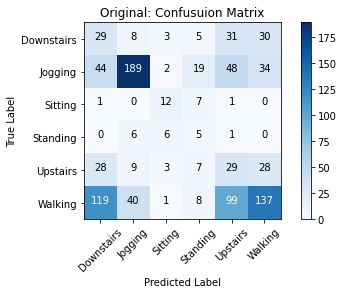

              precision    recall  f1-score   support

           0       0.13      0.27      0.18       106
           1       0.75      0.56      0.64       336
           2       0.44      0.57      0.50        21
           3       0.10      0.28      0.14        18
           4       0.14      0.28      0.19       104
           5       0.60      0.34      0.43       404

    accuracy                           0.41       989
   macro avg       0.36      0.38      0.35       989
weighted avg       0.54      0.41      0.45       989



In [43]:
clf2= KNeighborsClassifier(n_neighbors=12)
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))

In [44]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(trainData,trainLabelE)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [45]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [46]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 77.55%


In [47]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(Scaled_trainData,trainLabelE)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [48]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 95.14%


K-Nearest Neighbors Accuracy: 0.83418
Confusion matrix, without normalization
[[ 58   1   0   1  27  19]
 [  2 329   0   0   5   0]
 [  0   0  21   0   0   0]
 [  2   0   0  15   0   1]
 [ 35   0   0   0  60   9]
 [ 35   0   0   0  27 342]]


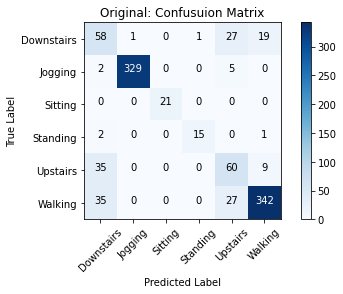

              precision    recall  f1-score   support

           0       0.44      0.55      0.49       106
           1       1.00      0.98      0.99       336
           2       1.00      1.00      1.00        21
           3       0.94      0.83      0.88        18
           4       0.50      0.58      0.54       104
           5       0.92      0.85      0.88       404

    accuracy                           0.83       989
   macro avg       0.80      0.80      0.80       989
weighted avg       0.85      0.83      0.84       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       0.44      0.55      0.92      0.49      0.71      0.48       106
    Jogging       1.00      0.98      1.00      0.99      0.99      0.98       336
    Sitting       1.00      1.00      1.00      1.00      1.00      1.00        21
   Standing       0.94      0.83      1.00      0.88      0.91      0.82        18
   Upstairs       0.50      0.58      0.9

In [49]:
clf2= KNeighborsClassifier(n_neighbors=1)
knnModel2 = clf2.fit(Scaled_trainData,trainLabelE)
y_te_pred2 = clf2.predict(Scaled_testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))

K-Nearest Neighbors Accuracy: 0.78564
Confusion matrix, without normalization
[[ 73   1   0   1  23   8]
 [  1 331   0   0   4   0]
 [  0   0  21   0   0   0]
 [  1   0   0  16   1   0]
 [ 42   1   0   0  54   7]
 [ 73   0   0   0  49 282]]


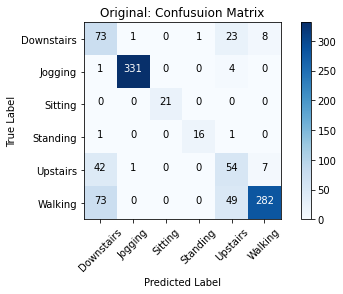

              precision    recall  f1-score   support

           0       0.38      0.69      0.49       106
           1       0.99      0.99      0.99       336
           2       1.00      1.00      1.00        21
           3       0.94      0.89      0.91        18
           4       0.41      0.52      0.46       104
           5       0.95      0.70      0.80       404

    accuracy                           0.79       989
   macro avg       0.78      0.80      0.78       989
weighted avg       0.85      0.79      0.80       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       0.38      0.69      0.87      0.49      0.77      0.59       106
    Jogging       0.99      0.99      1.00      0.99      0.99      0.98       336
    Sitting       1.00      1.00      1.00      1.00      1.00      1.00        21
   Standing       0.94      0.89      1.00      0.91      0.94      0.88        18
   Upstairs       0.41      0.52      0.9

In [50]:
clf2= KNeighborsClassifier(n_neighbors=4)
knnModel2 = clf2.fit(Scaled_trainData,trainLabelE)
y_te_pred2 = clf2.predict(Scaled_testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))

K-Nearest Neighbors Accuracy: 0.78969
Confusion matrix, without normalization
[[ 51   3   0   1  29  22]
 [  1 332   0   0   3   0]
 [  0   0  21   0   0   0]
 [  0   0   1  16   1   0]
 [ 27   6   0   0  50  21]
 [ 64   0   0   0  29 311]]


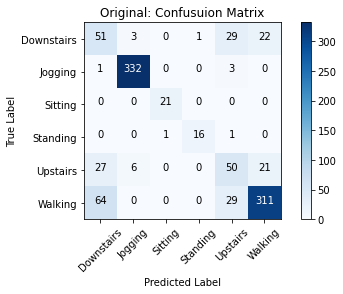

              precision    recall  f1-score   support

           0       0.36      0.48      0.41       106
           1       0.97      0.99      0.98       336
           2       0.95      1.00      0.98        21
           3       0.94      0.89      0.91        18
           4       0.45      0.48      0.46       104
           5       0.88      0.77      0.82       404

    accuracy                           0.79       989
   macro avg       0.76      0.77      0.76       989
weighted avg       0.81      0.79      0.80       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       0.38      0.69      0.87      0.49      0.77      0.59       106
    Jogging       0.99      0.99      1.00      0.99      0.99      0.98       336
    Sitting       1.00      1.00      1.00      1.00      1.00      1.00        21
   Standing       0.94      0.89      1.00      0.91      0.94      0.88        18
   Upstairs       0.41      0.52      0.9

In [51]:
from sklearn import svm

model = svm.SVC(kernel='rbf') 
model.fit(Scaled_trainData,trainLabelE)
y_pred= model.predict(Scaled_testData)

acc2 = accuracy_score(testLabelE,y_pred)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_pred)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_pred))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))

K-Nearest Neighbors Accuracy: 0.86653
Confusion matrix, without normalization
[[ 50   0   1   0  25  30]
 [  3 328   0   0   1   4]
 [  0   0  20   0   1   0]
 [  2   0   0  16   0   0]
 [ 18   5   0   0  70  11]
 [ 16   0   2   0  13 373]]


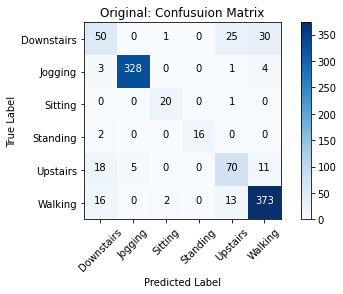

              precision    recall  f1-score   support

           0       0.56      0.47      0.51       106
           1       0.98      0.98      0.98       336
           2       0.87      0.95      0.91        21
           3       1.00      0.89      0.94        18
           4       0.64      0.67      0.65       104
           5       0.89      0.92      0.91       404

    accuracy                           0.87       989
   macro avg       0.82      0.81      0.82       989
weighted avg       0.86      0.87      0.86       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       0.38      0.69      0.87      0.49      0.77      0.59       106
    Jogging       0.99      0.99      1.00      0.99      0.99      0.98       336
    Sitting       1.00      1.00      1.00      1.00      1.00      1.00        21
   Standing       0.94      0.89      1.00      0.91      0.94      0.88        18
   Upstairs       0.41      0.52      0.9

In [52]:
from xgboost import XGBClassifier
model = XGBClassifier() 
model.fit(Scaled_trainData,trainLabelE)
y_pred= model.predict(Scaled_testData)

acc2 = accuracy_score(testLabelE,y_pred)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_pred)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_pred))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))